In [ ]:
from google.colab import files
files.upload()

Saving MLBFullDataSet_16_20.csv to MLBFullDataSet_16_20.csv


{'MLBFullDataSet_16_20.csv': b',Unnamed: 0,Runs_Allowed,Unnamed: 0,Winner,Runs,At_Bats,Hits,RBI,Earned_Runs,Bases_on_Balls,Strikeouts,Batting_Average,On_Base_Percentage,Slugging_Percentage,Pitches_Faced,Pitches_Pitched,Strikes_Earned,Strikes_Given,Off_Win_Prob_Contribution,Pressure_Pitcher_Faced,Base_Out_Runs,Assists,Home_Runs_Givenup,Grounded_Balls_Allowed,Fly_Balls_Allowed,Line_Drives_Allowed,Pitcher_Win_Contribution,Pitcher_Hits_Allowed_Per_Batter,Pitcher_Runs_Allowed_Per_Batter,Pitcher_ERA_Per_Batter,Pitcher_Home_Runs_Allowed_Per_Batter,Pitcher_Strikeouts_Per_Batter,Pythagorean W%\n0,0,3,0.0,1.0,12.0,40.0,15.0,12.0,11.0,5.0,3.0,0.375,0.435,0.75,165.0,187.0,115.0,94.0,0.491,0.95,7.4,8.0,2.0,18.0,20.0,10.0,0.009000000000000001,0.21697045883092395,0.0974230043997486,0.08925204274041483,0.027027027027027032,0.2370835952231301,0.9411764705882353\n1,1,1,1.0,1.0,2.0,33.0,7.0,2.0,2.0,2.0,5.0,0.212,0.257,0.33299999999999996,122.0,109.0,72.0,79.0,-0.223,1.42,-2.5,12.0,0.0,11.0,17.0,10.0,0.72

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving MLBstatdataFull2021_v5.csv to MLBstatdataFull2021_v5.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving createFeaturesMLBClass.py to createFeaturesMLBClass.py


In [ ]:
!pip install scikit-optimize
!pip install eli5

     |████████████████████████████████| 101 kB 3.7 MB/s 
     |████████████████████████████████| 106 kB 5.4 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from createFeaturesMLBClass import *
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler 
import csv  
import pandas_datareader as webreader
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import *
from sklearn import svm 
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
import scipy.stats as sp
from sklearn.model_selection import learning_curve
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 
import random
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pickle
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

/content/createFeaturesMLBClass.py:14: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
df1 = pd.read_csv("MLBFullDataSet_16_20.csv")
df1 = pd.DataFrame(df1).head(1380)
df1 = df1.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.2'])

df2 = pd.read_csv("MLBstatdataFull2021_v5.csv")
df2.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1'], inplace = True)


In [ ]:
#df_full = pd.concat([df1, df2], ignore_index = True)

#df1 =df_full.head(int(0.8*len(df_full)))
#df2 =df_full.tail(int(0.2*len(df_full)))


In [ ]:

file =pd.DataFrame({'Winner': df1['Winner'],
                           'Runs_Scored': df1['Runs'],
                           'Runs_Allowed': df1['Runs_Allowed'], 
                           'At_Bats': df1['At_Bats'], 
                           'Hits': df1['Hits'], 
                           'RBI': df1['RBI'],
                           'Earned_Runs': df1['Earned_Runs'],
                           'Bases_on_Balls': df1['Bases_on_Balls'],
                           'Strikeouts': df1['Strikeouts'],
                           'Batting_Average': df1['Batting_Average'],
                           'On_Base_Percentage':df1['On_Base_Percentage'],
                           'Slugging_Percentage': df1['Slugging_Percentage'],
                           'Pitches_Faced': df1['Pitches_Faced'],
                           'Pitches_Pitched': df1['Pitches_Pitched'],
                           'Strikes_Earned': df1['Strikes_Earned'],
                           'Strikes_Given': df1['Strikes_Given'],
                           'Off_Win_Prob_Contribution': df1['Off_Win_Prob_Contribution'],
                           'Pressure_Pitcher_Faced': df1['Pressure_Pitcher_Faced'],
                           'Base_Out_Runs': df1['Base_Out_Runs'],
                           'Assists': df1['Assists'],
                           'Home_Runs_Givenup': df1['Home_Runs_Givenup'],
                           'Grounded_Balls_Allowed': df1['Grounded_Balls_Allowed'],
                           'Fly_Balls_Allowed': df1['Fly_Balls_Allowed'],
                           'Line_Drives_Allowed': df1['Line_Drives_Allowed'],
                           'Pitcher_Win_Contribution': df1['Pitcher_Win_Contribution'],
                           'Pitcher_Hits_Allowed_Per_Batter': df1['Pitcher_Hits_Allowed_Per_Batter'],
                           'Pitcher_Runs_Allowed_Per_Batter': df1['Pitcher_Runs_Allowed_Per_Batter'],
                           'Pitcher_ERA_Per_Batter': df1['Pitcher_ERA_Per_Batter'],
                           'Pitcher_Home_Runs_Allowed_Per_Batter': df1['Pitcher_Home_Runs_Allowed_Per_Batter'],
                           'Pitcher_Strikeouts_Per_Batter': df1['Pitcher_Strikeouts_Per_Batter'],
                           'Pythagorean W%': df1['Pythagorean W%']})

file_pitcher_data = pd.DataFrame({
                             
                             'Pitcher_Hits_Allowed_Per_Batter': df1['Pitcher_Hits_Allowed_Per_Batter'],
                             'Pitcher_Runs_Allowed_Per_Batter': df1['Pitcher_Runs_Allowed_Per_Batter'],
                             'Pitcher_ERA_Per_Batter': df1['Pitcher_ERA_Per_Batter'],
                             'Pitcher_Home_Runs_Allowed_Per_Batter': df1['Pitcher_Home_Runs_Allowed_Per_Batter'],
                             'Pitcher_Strikeouts_Per_Batter': df1['Pitcher_Strikeouts_Per_Batter']})



In [ ]:
file_test =pd.DataFrame({'Winner': df2['Winner'],
                           'Runs_Scored': df2['Runs'],
                           'Runs_Allowed': df2['Runs_Allowed'], 
                           'At_Bats': df2['At_Bats'], 
                           'Hits': df2['Hits'], 
                           'RBI': df2['RBI'],
                           'Earned_Runs': df2['Earned_Runs'],
                           'Bases_on_Balls': df2['Bases_on_Balls'],
                           'Strikeouts': df2['Strikeouts'],
                           'Batting_Average': df2['Batting_Average'],
                           'On_Base_Percentage':df2['On_Base_Percentage'],
                           'Slugging_Percentage': df2['Slugging_Percentage'],
                           'Pitches_Faced': df2['Pitches_Faced'],
                           'Pitches_Pitched': df2['Pitches_Pitched'],
                           'Strikes_Earned': df2['Strikes_Earned'],
                           'Strikes_Given': df2['Strikes_Given'],
                           'Off_Win_Prob_Contribution': df2['Off_Win_Prob_Contribution'],
                           'Pressure_Pitcher_Faced': df2['Pressure_Pitcher_Faced'],
                           'Base_Out_Runs': df2['Base_Out_Runs'],
                           'Assists': df2['Assists'],
                           'Home_Runs_Givenup': df2['Home_Runs_Givenup'],
                           'Grounded_Balls_Allowed': df2['Grounded_Balls_Allowed'],
                           'Fly_Balls_Allowed': df2['Fly_Balls_Allowed'],
                           'Line_Drives_Allowed': df2['Line_Drives_Allowed'],
                           'Pitcher_Win_Contribution': df2['Pitcher_Win_Contribution'],
                           'Pitcher_Hits_Allowed_Per_Batter': df2['Pitcher_Hits_Allowed_Per_Batter'],
                           'Pitcher_Runs_Allowed_Per_Batter': df2['Pitcher_Runs_Allowed_Per_Batter'],
                           'Pitcher_ERA_Per_Batter': df2['Pitcher_ERA_Per_Batter'],
                           'Pitcher_Home_Runs_Allowed_Per_Batter': df2['Pitcher_Home_Runs_Allowed_Per_Batter'],
                           'Pitcher_Strikeouts_Per_Batter': df2['Pitcher_Strikeouts_Per_Batter'],
                           'Pythagorean W%': df2['Pythagorean W%']})

file_pitcher_data_test = pd.DataFrame({
                             
                             'Pitcher_Hits_Allowed_Per_Batter': df2['Pitcher_Hits_Allowed_Per_Batter'],
                             'Pitcher_Runs_Allowed_Per_Batter': df2['Pitcher_Runs_Allowed_Per_Batter'],
                             'Pitcher_ERA_Per_Batter': df2['Pitcher_ERA_Per_Batter'],
                             'Pitcher_Home_Runs_Allowed_Per_Batter': df2['Pitcher_Home_Runs_Allowed_Per_Batter'],
                             'Pitcher_Strikeouts_Per_Batter': df2['Pitcher_Strikeouts_Per_Batter']})

In [ ]:
#Call function createFeatures to create technical indicators from file 
features = createFeaturesClassMLB(file)
features_test = createFeaturesClassMLB(file_test)


file = pd.DataFrame(file)
file_test = pd.DataFrame(file_test)

file_fit = pd.DataFrame({'Win': file['Winner']})
file_fit_test = pd.DataFrame({'Win': file_test['Winner']})



In [ ]:
file_feature = pd.DataFrame({'Runs_Scored EMA3': features['Runs_Scored EMA3'],
                             'At_Bats EMA3': features['At_Bats EMA3'], 
                             'Hits EMA3' : features['Hits EMA3'],
                             'RBI EMA3' : features['RBI EMA3'],
                             'Earned_Runs EMA3' : features['Earned_Runs EMA3'],
                             'Bases_on_Balls EMA3' : features['Bases_on_Balls EMA3'],
                             'Strikeouts EMA3' : features['Strikeouts EMA3'],
                             'On_Base_Percentage EMA' : features['On_Base_Percentage EMA3'],
                             'Slugging_Percentage EMA' : features['Slugging_Percentage EMA3'],
                             'Pitches_Faced EMA' : features['Pitches_Faced EMA3'],
                             'Pitches_Pitched EMA' : features['Pitches_Pitched EMA3'],
                             'Strikes_Earned EMA' : features['Strikes_Earned EMA3'],
                             'Strikes_Given EMA' : features['Strikes_Given EMA3'],
                             'Base_Out_Runs EMA' : features['Base_Out_Runs EMA3'],
                             'Home_Runs_Givenup EMA' : features['Home_Runs_Givenup EMA3'],
                             'Grounded_Balls_Allowed EMA' : features['Grounded_Balls_Allowed EMA3'],
                             'Fly_Balls_Allowed EMA' : features['Fly_Balls_Allowed EMA3'],
                             'Line_Drives_Allowed EMA' : features['Line_Drives_Allowed EMA3'],
                             'Pitcher_Win_Contribution EMA': features['Pitcher_Win_Contribution EMA3'],
                             'Pythagorean W%': file['Pythagorean W%']})

file_feature_test = pd.DataFrame({'Runs_Scored EMA3': features_test['Runs_Scored EMA3'],
                             'At_Bats EMA3': features_test['At_Bats EMA3'], 
                             'Hits EMA3' : features_test['Hits EMA3'],
                             'RBI EMA3' : features_test['RBI EMA3'],
                             'Earned_Runs EMA3' : features_test['Earned_Runs EMA3'],
                             'Bases_on_Balls EMA3' : features_test['Bases_on_Balls EMA3'],
                             'Strikeouts EMA3' : features_test['Strikeouts EMA3'],
                             'On_Base_Percentage EMA' : features_test['On_Base_Percentage EMA3'],
                             'Slugging_Percentage EMA' : features_test['Slugging_Percentage EMA3'],
                             'Pitches_Faced EMA' : features_test['Pitches_Faced EMA3'],
                             'Pitches_Pitched EMA' : features_test['Pitches_Pitched EMA3'],
                             'Strikes_Earned EMA' : features_test['Strikes_Earned EMA3'],
                             'Strikes_Given EMA' : features_test['Strikes_Given EMA3'],
                             'Base_Out_Runs EMA' : features_test['Base_Out_Runs EMA3'],
                             'Home_Runs_Givenup EMA' : features_test['Home_Runs_Givenup EMA3'],
                             'Grounded_Balls_Allowed EMA' : features_test['Grounded_Balls_Allowed EMA3'],
                             'Fly_Balls_Allowed EMA' : features_test['Fly_Balls_Allowed EMA3'],
                             'Line_Drives_Allowed EMA' : features_test['Line_Drives_Allowed EMA3'],
                             'Pitcher_Win_Contribution EMA': features_test['Pitcher_Win_Contribution EMA3'],
                             'Pythagorean W%': file_test['Pythagorean W%']})



In [ ]:
file_feature_adj = file_feature.head(int(len(file_feature) - 1)) 
file_pitcher_data = file_pitcher_data.tail(int(len(file_pitcher_data) - 1)).reset_index()
file_pitcher_data = file_pitcher_data.drop(columns = ['index'])

file_feature = pd.concat([file_feature_adj, file_pitcher_data], axis = 1)

print(file_feature.shape)
                           
file_fit = file_fit.head(int(len(file_fit)))
file_fit = file_fit.tail(int(len(file_fit) - 1))

print(file_fit.shape)



(1379, 25)
(1379, 1)


In [ ]:
file_feature_adj_test = file_feature_test.head(int(len(file_feature_test) - 1)).reset_index()
file_pitcher_data_test = file_pitcher_data_test.tail(int(len(file_pitcher_data_test) - 1)).reset_index()
file_pitcher_data_test = file_pitcher_data_test.drop(columns = ['index'])


file_feature_test = pd.concat([file_feature_adj_test, file_pitcher_data_test], axis = 1).drop(columns = ['index'])

print(file_feature_test.shape)


file_fit_test = file_fit_test.head(int(len(file_fit_test)))
file_fit_test = file_fit_test.tail(int(len(file_fit_test) - 1))

print(file_fit_test.shape)

(3440, 25)
(3440, 1)


In [ ]:
#Create the scaler to normalize the data between 0 and 1 to make model training easier
scaler = MinMaxScaler(feature_range=(-1,1))
#Create a second scaler for future inverse transform on correct data set size
scaler_pred = MinMaxScaler(feature_range = (-1,1))
#Scale selected data to fit model

file_feature = pd.DataFrame(scaler.fit_transform(file_feature))
file_feature_test = pd.DataFrame(scaler.transform(file_feature_test))


            0         1         2  ...        23        24       Win
0    1.000000  0.523874  0.802553  ...  0.011280  0.018502  0.464952
1    0.523874  1.000000  0.737452  ...  0.015633  0.020393  0.109882
2    0.802553  0.737452  1.000000  ...  0.015448  0.016082  0.335955
3    0.988717  0.512077  0.792415  ...  0.008012  0.014354  0.459899
4    0.960511  0.423444  0.775676  ...  0.004214  0.025960  0.462537
5    0.320216  0.126820  0.180077  ...  0.023731  0.002165  0.216101
6   -0.220560  0.065544 -0.227571  ...  0.073272  0.002653 -0.157419
7    0.765297  0.426516  0.840789  ...  0.015771  0.004353  0.410303
8    0.824098  0.408614  0.785732  ...  0.009986  0.014344  0.411969
9    0.104892  0.371312  0.146300  ... -0.005251  0.008995 -0.102097
10   0.450742  0.654435  0.502044  ...  0.010670 -0.028703  0.159964
11   0.393306  0.742634  0.517548  ...  0.004296 -0.031868  0.090943
12   0.132152  0.393023  0.176167  ...  0.006590  0.035432 -0.031899
13   0.984576  0.415217  0.769538 

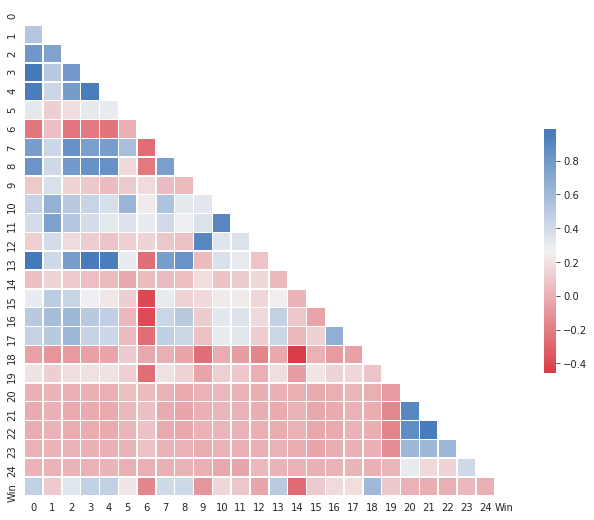

In [ ]:
feature_corr_data = pd.concat([file_feature, file_fit], axis = 1)

# use the pands .corr() function to compute pairwise correlations for the dataframe
corr = feature_corr_data.corr()
print(corr)
# visualise the data with seaborn
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.set_style(style = 'white')
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(10, 250, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [ ]:
kpca = KernelPCA(n_components = 10, kernel = 'rbf', gamma = 5)

file_feature = pd.DataFrame(kpca.fit_transform(file_feature))
file_feature_test = pd.DataFrame(kpca.transform(file_feature_test))

                0             1  ...             9       Win
0    1.000000e+00  4.512085e-16  ... -8.567900e-17 -0.280075
1    4.512085e-16  1.000000e+00  ... -6.696541e-17  0.144413
2    9.504386e-17  6.037268e-17  ... -3.813301e-17 -0.258696
3    6.092496e-17 -2.454313e-16  ...  1.304495e-16  0.017811
4   -5.262485e-17  1.582426e-16  ... -2.036576e-17 -0.036153
5    7.389293e-17 -1.602060e-16  ... -1.153220e-16  0.105404
6    5.099258e-17  2.355952e-17  ... -1.724880e-17  0.062883
7   -4.774234e-18  8.332049e-17  ... -1.008664e-17  0.115754
8    2.171810e-16  4.297006e-16  ...  1.314785e-17  0.029405
9   -8.567900e-17 -6.696541e-17  ...  1.000000e+00 -0.032816
Win -2.800750e-01  1.444133e-01  ... -3.281577e-02  1.000000

[11 rows x 11 columns]
      Win
1008  0.0
387   0.0
1142  0.0
265   1.0
1     1.0
...   ...
1301  1.0
220   0.0
1373  1.0
627   0.0
292   1.0

[138 rows x 1 columns]


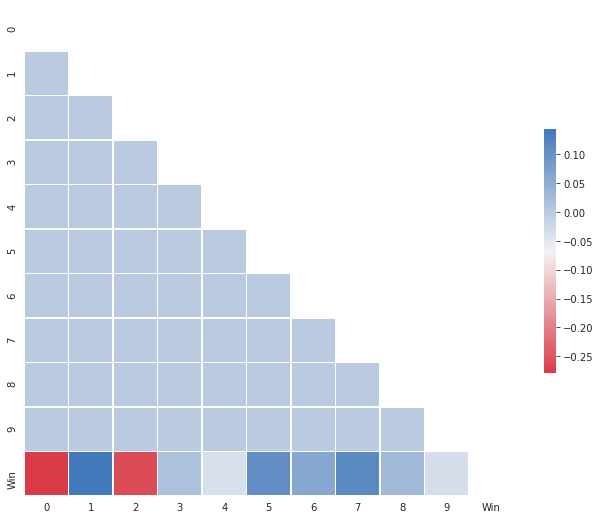

In [ ]:
file_corr_data = pd.concat([file_feature, file_fit], axis = 1)

# use the pands .corr() function to compute pairwise correlations for the dataframe
corr = file_corr_data.corr()
print(corr)
# visualise the data with seaborn
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.set_style(style = 'white')
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(10, 250, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

## Create training and test sets
X_train,X_test, Y_train, Y_test = train_test_split(file_feature, file_fit, train_size = 0.9, test_size = 0.1, random_state = 0, stratify = file_fit)


print(Y_test)


In [ ]:
# ## Create a grid search for optimal hyperparameters 
#param_grid = {'C': Integer(1, 500), 'gamma': Real(0.001, 0.3), 'kernel': Categorical({"linear", "rbf", "poly"}) }

param_grid = {'C': Integer(1, 500)}



#Generate the SVM model we will use
model = svm.SVC()


cv = KFold(10, shuffle=True, random_state=1).get_n_splits(X_train)

model = BayesSearchCV(model, param_grid, n_iter = 30, scoring = 'roc_auc', cv=cv, return_train_score = True, refit = True).fit(X_train, Y_train)


scores = cross_val_score(model, X_train, Y_train, cv = cv, scoring = "roc_auc")
print(scores)

model = model.best_estimator_


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

[0.40804303 0.47879261 0.40515222 0.57481135 0.36247723 0.43325527
 0.49518605 0.41582097 0.43689826 0.45755208]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
## Get the feature weights of the model for feature selection
perm = PermutationImportance(model, random_state=1).fit(X_test, Y_test)
Weights_features = eli5.explain_weights_df(perm, feature_names = file_feature.columns.tolist())
print(Weights_features)

test_predict_scaled = model.predict(X_test)
test_predict = test_predict_scaled.reshape(-1,1)
test_predict = pd.DataFrame(test_predict)


print(test_predict.head(25))
print(Y_test)


   feature    weight       std
0        3  0.034783  0.012467
1        1 -0.001449  0.018560
2        8 -0.005797  0.028767
3        5 -0.005797  0.020186
4        9 -0.010145  0.012634
5        4 -0.010145  0.011774
6        7 -0.017391  0.016901
7        0 -0.017391  0.027726
8        2 -0.017391  0.026167
9        6 -0.062319  0.021787
      0
0   1.0
1   0.0
2   1.0
3   0.0
4   0.0
5   1.0
6   0.0
7   1.0
8   0.0
9   0.0
10  0.0
11  1.0
12  0.0
13  0.0
14  0.0
15  0.0
16  0.0
17  0.0
18  1.0
19  0.0
20  1.0
21  0.0
22  1.0
23  1.0
24  1.0
      Win
1008  0.0
387   0.0
1142  0.0
265   1.0
1     1.0
...   ...
1301  1.0
220   0.0
1373  1.0
627   0.0
292   1.0

[138 rows x 1 columns]


In [ ]:

Confusion_Matrix = confusion_matrix(Y_test, test_predict)
print(Confusion_Matrix)
Prediction_Accuracy = ((Confusion_Matrix[0,0]+Confusion_Matrix[1,1])/(len(Y_test)))*100
print(Prediction_Accuracy)

[[46 24]
 [51 17]]
45.65217391304348


In [ ]:
test_set_predictions = model.predict(file_feature_test)
test_set_predictions = test_set_predictions.reshape(-1,1)
test_set_predictions = pd.DataFrame(test_set_predictions)
test_set_predictions = pd.DataFrame({'Predicted_Outcome': test_set_predictions[0]})
print(test_set_predictions.head(25))

    Predicted_Outcome
0                 0.0
1                 0.0
2                 0.0
3                 0.0
4                 1.0
5                 0.0
6                 0.0
7                 0.0
8                 0.0
9                 1.0
10                0.0
11                1.0
12                0.0
13                0.0
14                1.0
15                1.0
16                0.0
17                0.0
18                1.0
19                0.0
20                0.0
21                0.0
22                0.0
23                0.0
24                0.0


In [ ]:
#prediction_probabilities = model.predict_proba(file_feature_test)
#prediction_probabilities = pd.DataFrame(prediction_probabilities)
#print(prediction_probabilities.head(50))

In [ ]:
Test_Set_Confusion_Matrix = confusion_matrix(file_fit_test, test_set_predictions)
print(Test_Set_Confusion_Matrix)
Test_Set_Prediction_Accuracy = ((Test_Set_Confusion_Matrix[0,0]+Test_Set_Confusion_Matrix[1,1])/(len(file_fit_test)))*100
print(Test_Set_Prediction_Accuracy)

[[1298  422]
 [1316  404]]
49.47674418604651


In [ ]:
#predictions_and_probs = pd.concat([test_set_predictions, file_fit_test, prediction_probabilities], axis = 1 )
#predictions_and_probs = pd.DataFrame({'Predicted_Outcome': predictions_and_probs['Predicted_Outcome'], 'Actual_Outcome': predictions_and_probs['Win'], 'Prob_Loss': predictions_and_probs[0], 'Prob_Win': predictions_and_probs[1]})
#print(predictions_and_probs.head(20))

In [ ]:
from google.colab import drive
drive.mount('drive')

In [ ]:

test_set_predictions.to_csv('test_predictions_v8.csv')
!cp test_predictions_v8.csv "drive/My Drive/"

In [ ]:
predictions_and_probs.to_csv('predictions_and_probs_v8.csv')
!cp predictions_and_probs_v8.csv "drive/My Drive/"